NYU v2
======

https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html


Use of NYUv2 in literature
==========================

"We train our
network on NYUv2 raw training set and evaluate the depth
prediction on labeled test set." - [*Zhao et al. 2020 Towards Better Generalization: Joint Depth-Pose Learning without PoseNet*](https://cg.cs.tsinghua.edu.cn/papers/CVPR-2020-pose.pdf)

(Bian 2020: preprint of Bian 2022 (below) https://arxiv.org/abs/2006.02708v1)

"In this section, we evaluate our MonoIndoor on the
NYUv2 depth dataset [(NYU)] which contains 464 indoor video
sequences captured by a hand-held Microsoft Kinect RGB-
D camera with a resolution of 640×480. We use the official
training and validation splits which include 302 and 33 se-
quences respectively. We rectify the images with provided
camera parameters to remove distortions. Following [(Zhao2020), (Bian2020)],
the raw dataset is firstly downsampled 10 times along the
temporal dimension to remove redundant frames, resulting
in ∼ 20K images for training. During training, images are
resized to 320×256. We use officially provided 654 images
with dense labelled depth maps for testing." - [*Ji et al. 2021 MonoIndoor: Towards Good Practice of Self-Supervised
Monocular Depth Estimation for Indoor Environments*](https://openaccess.thecvf.com/content/ICCV2021/papers/Ji_MonoIndoor_Towards_Good_Practice_of_Self-Supervised_Monocular_Depth_Estimation_for_ICCV_2021_paper.pdf)

"The NYU Depth v2 [39] dataset contains 582 indoor
video scenes taken with a Microsoft Kinect camera and the
training split contains 283 scenes (about 230K images). To
train the DepthNet and PoseNet, we first use the method
mentioned in Section 3.4 to filter out the image pairs with
pure rotation. About 30% images are discarded and finally
we use about 180K images for training. We fix the length
of training image sequences to be 3 frames for all the three
networks, and treat the central frame as the target view and
the ±10 frames as the source views. We only use raw RGB
image sequences for training and the images are resized to
192 ×256." - [*Zhou et al. 2019 Moving Indoor: Unsupervised Video Depth Learning in Challenging
Environments*](https://arxiv.org/pdf/1910.08898v1.pdf)

"NYU Depth V2. NYU Depth V2 consists of a total 582 indoor scenes. We
adopt the same train split of 283 scenes following previous work on indoor depth
estimation [(Zhou2019)] and provide our results on the official test set with the standard
depth evaluation criteria. We sample the training set at 10 frames interval as
our target views and use ±10, ±20 frames as our source views. This leaves us
around 20K unique images, a number much less than the 180K images used in
the previous work of unsupervised indoor depth estimation [(Zhou2019)]. We undistort
the input image as in [42] and crop 16 black pixels from the border region.
We compare with MovingIndoor [(Zhou2019)], the pioneer work on unsupervised in-
door depth estimation and Monov2 [17], a state-of-the-art unsupervised depth
estimation method on outdoor datasets." - [*Yu et al. 2020 P2Net: Patch-match and Plane-regularization
for Unsupervised Indoor Depth Estimation*](https://www.ecva.net/papers/eccv_2020/papers_ECCV/papers/123690205.pdf) / [github](https://github.com/svip-lab/Indoor-SfMLearner)

"NYUv2 [36]. The dataset is composed of indoor video sequences
recorded by a handheld Kinect RGB-D camera at 640 × 480
resolution. The dataset contains 464 scenes taken from three cities.
We use the officially provided 654 densely labeled images for
testing, and use the rest 335 sequences (no overlap with testing
scenes) for training (302) and validation (33). The raw training
sequences contain 268K images. It is first downsampled 10 times
to remove redundant frames. We train on the pre-processed data
(i.e., it generates 67K rectified pairs) and train directly on original
data with ARN, respectively. The images are resized to 320×256
resolution for training." - [*Bian et al. 2022 Auto-Rectify Network for Unsupervised Indoor
Depth Estimation*](https://jwbian.net/Papers/ARN_Depth_TPAMI_22.pdf) / [github](https://github.com/JiawangBian/sc_depth_pl) / [dataset](https://1drv.ms/u/s!AiV6XqkxJHE2mUUA5hElvhZXnqOn?e=51SIE1)

---------

What is this official train/test split?
- https://github.com/ayanc/mdepth/issues/5 --> https://cs.nyu.edu/~silberman/projects/indoor_scene_seg_sup.html
- https://github.com/janivanecky/Depth-Estimation/tree/master/dataset ?

The labeled dataset contains 1449 images...

Trying to make sense of the numbers...:

| Number | Description | Source |
| ------:|:----------- |:------ |
| 268K | Raw training images (Bian) | ?
| 180K | Images (Yu, Zhou) | ?
| 67K | Rectified pairs (Bian) | ?
| ~20K | Images for training (10x downsampled) (Ji, Yu) | ?
| 654 | Densely labeled test images (Ji, Bian) | Test split of labeled images from splits.mat
| 582 | Indoor scenes (Yu, Zhou) | 528(!) *scenes* in NYU **v1** + v2 (train and test)
| 464 | Indoor video sequences (Ji) | Unique *scenes* in labeled dataset
| 335 | Rest sequences (Bian) | ?
| 302 | Sequences in training split (Ji, Bian) | 90% of Rest sequences
| 283 | Scenes in train split (Yu, Zhou) | 284 Raw image folders in splts.mat train set?
| 33 | Sequences in validation split (Ji, Bian) | 10% of Rest sequences


Downloads
=========

Labeled dataset: http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat
    - MAT file. Variables: see web page for description.
        - images: HxWx3xN matrix
        - scenes: Nx1 array, name of scene in which image N is taken
        - sceneTypes: Nx1 type of scene
        - rawDepths: HxWxN. Depths in m reprojected onto RGB image
            - depths: HxWxN. Inpainted depths

Raw dataset: https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html#raw_parts
    - Extremely large
    - Not post-processed (e.g. RGB and Depth synchronization)

Toolbox: http://cs.nyu.edu/~silberman/code/toolbox_nyu_depth_v2.zip
    - `camera_params.m`: Kinect camera parameters
    - `get_synched_frames.m`: only for raw dataset, I hope?


Download and installation
=========================

Setup script provided, run:

In [1]:
%%bash
make all

make: Nothing to be done for 'all'.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import scipy.io
import mat73

import os
import glob
import sys


sys.path.insert(0, 'sc_depth_pl')
from datasets.train_folders import TrainFolder
from datasets.test_folder import TestSet

Splits.mat
==========

The splits.mat file provides a train and test split of the *labeled* dataset:

In [2]:
splits = scipy.io.loadmat('data/splits.mat')
print(splits.keys())

trainNdxs = splits['trainNdxs']
testNdxs = splits['testNdxs']

print(min(trainNdxs), max(trainNdxs), trainNdxs.shape)
print(min(testNdxs), max(testNdxs), testNdxs.shape)

print(trainNdxs.shape[0] + testNdxs.shape[0])

print(any([idx in testNdxs[:, 0] for idx in trainNdxs[:, 0]]))  # Overlap between sets? No.

dict_keys(['__header__', '__version__', '__globals__', 'trainNdxs', 'testNdxs'])
[3] [1440] (795, 1)
[1] [1449] (654, 1)
1449
False


Splits, scenes and scene types
==============================

Further investigation where the numbers in literature come from...

Labeled dataset images can be obtained by loading the .mat file in Python. Note that the .mat file uses a format that cannot be loaded using scipy's `loadmat`!. Instead, use the `mat73` library to load the .mat file.

Note: loading the entire .mat file can take quite some time...

In [3]:
nyu = mat73.loadmat('data/nyu_depth_v2_labeled.mat')  # Note: may throw an error `ERROR:root:ERROR: MATLAB type not supported: containers.Map, (uint32)`

ERROR:root:ERROR: MATLAB type not supported: containers.Map, (uint32)


In [4]:
for key in nyu.keys():
    print(key)

accelData
depths
images
instances
labels
names
namesToIds
rawDepthFilenames
rawDepths
rawRgbFilenames
sceneTypes
scenes


Investigate scene numbers more closely:

In [31]:
scenes = nyu['scenes']
print(type(scenes))
print(len(scenes), 'images in labeled dataset')
print(scenes[0])

scenes_unique = set()
for s in scenes:
    scenes_unique.add(s[0])

print(len(scenes_unique), 'unique scenes')

<class 'list'>
1449 images in labeled dataset
['kitchen_0004']
464 unique scenes


In [30]:
scenes_train = set([scenes[idx-1][0] for idx in trainNdxs[:, 0]])  # -1 because Matlab indexes from 1
scenes_test = set([scenes[idx-1][0] for idx in testNdxs[:, 0]])

print(len(scenes_train), 'unique scenes (train)')
print(len(scenes_test), 'unique scenes (test)')

249 unique scenes (train)
215 unique scenes (test)


What about scene types?

In [28]:
sceneTypes = nyu['sceneTypes']
print(type(sceneTypes))
print(len(sceneTypes))
print(sceneTypes[0])

sceneTypes_unique = set()
for s in sceneTypes:
    sceneTypes_unique.add(s[0])

print(len(sceneTypes_unique), 'unique scene types')

<class 'list'>
1449
['kitchen']
27 unique scene types


This does also not explain the split numbers in literature... -__-

Can they be found from the Rgb filenames?

In [25]:
rawRgbFilenames = nyu['rawRgbFilenames']
print(type(rawRgbFilenames))
print(len(rawRgbFilenames))
print(rawRgbFilenames[0])

rawRgbFilenames_unique = set()
for s in rawRgbFilenames:
    # rawRgbFilenames_unique.add(s[0])
    rawRgbFilenames_unique.add(s[0].split('/')[0])  # Split: only look at folder names?

print(len(rawRgbFilenames_unique), 'unique raw image folders')
print(list(rawRgbFilenames_unique)[0:10])

fn_train = [rawRgbFilenames[idx-1][0].split('/')[0] for idx in trainNdxs[:, 0]]
fn_test = [rawRgbFilenames[idx-1][0].split('/')[0] for idx in testNdxs[:, 0]]
print(len(set(fn_train)), 'unique raw image folders (train)')
print(len(set(fn_test)), 'unique raw image folders (test)')
print(len(set(fn_train)) + len(set(fn_test)))  # No overlap between train and test image folders

<class 'list'>
1449
['kitchen_0004/r-1294851097.528505-2321469380.ppm']
518 unique raw image folders
['living_room_0040', 'bathroom_0036', 'playroom_0002', 'playroom_0003', 'living_room_0042a', 'office_kitchen_0001b', 'bedroom_0030', 'living_room_0030b', 'kitchen_0059', 'bathroom_0022']
284 unique raw image folders (train)
234 unique raw image folders (test)
518


In [27]:
# Collect the same information for NYUv1
nyuv1_fn = scipy.io.loadmat('data/nyu_depth_v1_filenames.mat')
print(nyuv1_fn.keys())

v1rgbFilenames = nyuv1_fn['rawRgbFilenames']
print(v1rgbFilenames[0][0][0])

v1_folders = set([x[0][0].split('/')[0] for x in v1rgbFilenames])
print(len(v1_folders), 'unique raw image folders')

print(len(v1_folders.union(rawRgbFilenames_unique)), 'unique raw image folders between NYU v1 and v2')

dict_keys(['__header__', '__version__', '__globals__', 'rawDepthFilenames', 'rawRgbFilenames'])
kitchen_0004/r-1294851097.528505-2321469380.ppm
79 unique raw image folders
523 unique raw image folders between NYU v1 and v2


Obtaining images
================

Images can be read from the 'images' matrix:

(480, 640, 3, 1449)


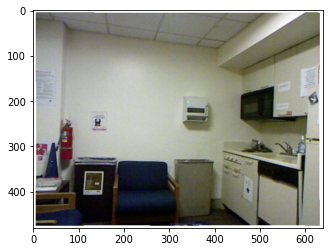

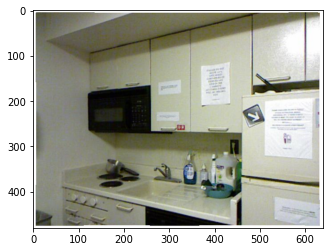

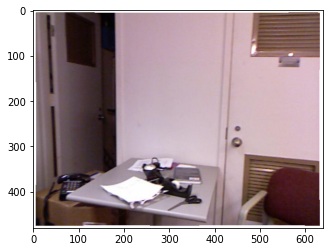

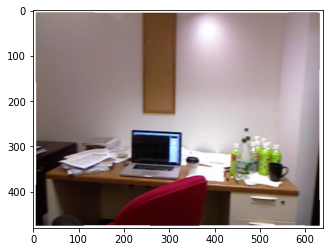

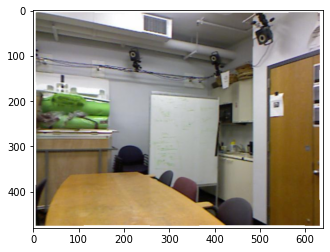

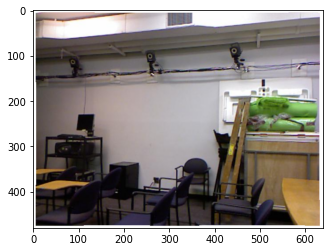

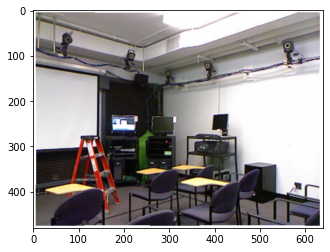

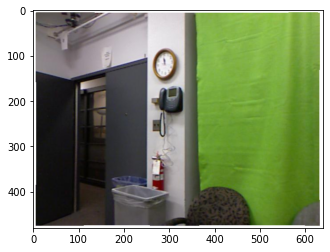

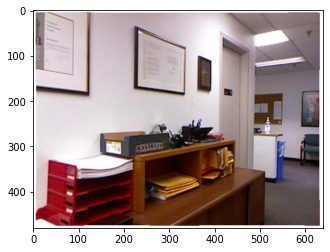

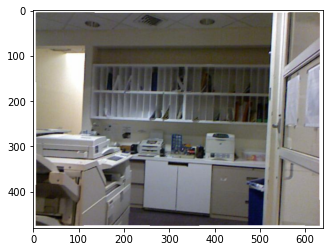

In [9]:
imgs = nyu['images']

print(imgs.shape)  # Number of images: 1449. Matches train/test split total.

for i in range(10):
    plt.figure()
    plt.imshow(imgs[:,:,:,i])
plt.show()

**Problem: the images do not form a sequence...**

The Bian et al. split
=====================

https://github.com/JiawangBian/sc_depth_pl

File structure:
```
data/bian2022_split/nyu/
  testing/
    color/
      <number>.png  - RGB input
    depth/
      <number>.png  - True depth
  training/
    <scene>/
      depth/
        <number>.png  - True depth
      <number>.jpg    - RGB input
      cam.txt         - Camera intrinsic matrix
    train.txt         - Training scenes
    val.txt           - Validation scenes
```

Images within scenes appear to be sequential.

"NYUv2 [36]. The dataset is composed of indoor video sequences
recorded by a handheld Kinect RGB-D camera at 640 × 480
resolution. The dataset contains 464 scenes taken from three cities.
We use the officially provided 654 densely labeled images for
testing, and use the rest 335 sequences (no overlap with testing
scenes) for training (302) and validation (33). The raw training
sequences contain 268K images. It is first downsampled 10 times
to remove redundant frames. We train on the pre-processed data
(i.e., it generates 67K rectified pairs) and train directly on original
data with ARN, respectively. The images are resized to 320×256
resolution for training." - [*Bian et al. 2022 Auto-Rectify Network for Unsupervised Indoor
Depth Estimation*](https://jwbian.net/Papers/ARN_Depth_TPAMI_22.pdf)

Verify test images:

In [3]:
%%bash
ls -1 data/bian2022_split/nyu/testing/color/*.png | wc -l

654


Verify training and validation scenes:

In [1]:
%%bash
wc -l data/bian2022_split/nyu/training/train.txt
wc -l data/bian2022_split/nyu/training/val.txt

302 data/bian2022_split/nyu/training/train.txt
33 data/bian2022_split/nyu/training/val.txt


Verify number of training images:

In [2]:
%%bash
find -name *.jpg | wc -l

28547


Number of training images appears to be ~28K, so assume it has already been downsampled by a factor 10 as described? (Possibly: typo in original text: 286K instead of 268K?)

Verify image resolution:

In [8]:
img = mpimg.imread('data/bian2022_split/nyu/training/dining_room_0001b/000144.jpg')
print(img.shape)

(480, 640, 3)


Images are not downscaled yet.

Do the images form a sequence?

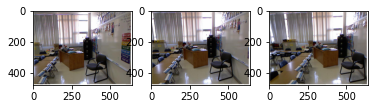

In [23]:
img_filenames = sorted(glob.glob('data/bian2022_split/nyu/training/classroom_0003/*.jpg'))

N = 3
plt.figure()
for i in range(N):
    plt.subplot(1, N, i + 1)
    plt.imshow(mpimg.imread(img_filenames[3 * i]))
plt.show()

Yes, the images form a sequence and movement is visible (but had to increase frame distance for it to be visible).

PyTorch Datasets
================

Demonstrate Bian's Dataset classes

In [6]:
root = 'data/bian2022_split/nyu'

train_set = TrainFolder(
    root=root,
    train=True,             # True: training set; False: validation set
    sequence_length=3,      # Number of frames in image sequece (including input image)
    transform=None,
    skip_frames=1,          # Distance between sequence images
    dataset='nyu'
)

x = train_set[0]    # x: (tgt_img, ref_imgs, intrinsics)
print(np.asarray(x[0]).shape)       # [height, width, channels]
print(np.asarray(x[1]).shape)       # [imgs, height, width, channels]
print(np.asarray(x[2]))             # [3, 3]

(480, 640, 3)
(2, 480, 640, 3)
[[518.8579    0.      325.58246]
 [  0.      519.4696  253.73618]
 [  0.        0.        1.     ]]


(480, 640, 3)
float32
(2, 480, 640, 3)
[[518.8579    0.      325.58246]
 [  0.      519.4696  253.73618]
 [  0.        0.        1.     ]]


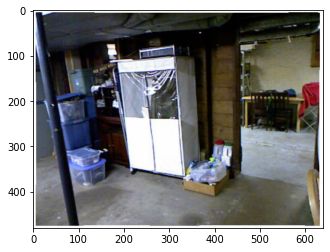

In [12]:
val_set = TrainFolder(
    root=root,
    train=False,
    sequence_length=3,
    transform=None,
    skip_frames=1,
    dataset='nyu'
)

x = val_set[0]    # x: (tgt_img, ref_imgs, intrinsics)
print(np.asarray(x[0]).shape)       # [height, width, channels]
print(np.asarray(x[0]).dtype)
print(np.asarray(x[1]).shape)       # [imgs, height, width, channels]
print(np.asarray(x[2]))             # [3, 3]

plt.figure()
plt.imshow(np.asarray(x[0]) / 255)  # x[0] is float32 [0..255], imshow expects [0..1] for floats
plt.show()

(480, 640, 3)
(480, 640)


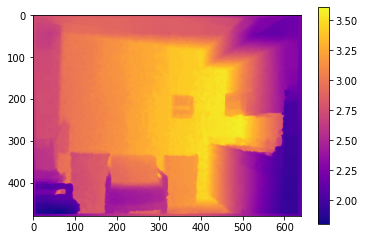

In [19]:
test_set = TestSet(
    root=root,
    transform=None,
    dataset='nyu'
)

x = test_set[0]     # img, depth
print(np.asarray(x[0]).shape)
print(np.asarray(x[1]).shape)

plt.figure()
plt.imshow(np.asarray(x[1]), cmap='plasma')
plt.colorbar()
plt.show()